In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [9]:
predicted_labels = kmeans.labels_


In [11]:
print("\nCluster Centers (standardized):\n", kmeans.cluster_centers_)


Cluster Centers (standardized):
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [13]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[ 0 33 17]
 [46  0  4]
 [50  0  0]]


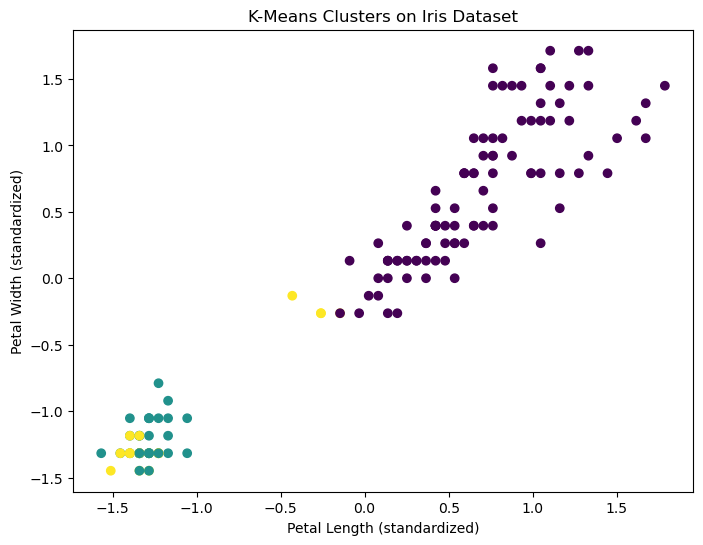

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=predicted_labels, cmap='viridis')
plt.xlabel("Petal Length (standardized)")
plt.ylabel("Petal Width (standardized)")
plt.title("K-Means Clusters on Iris Dataset")
plt.show()